# 数据生成规则

生成Z，A，W
$\mathcal{R}$
1. $Z \sim \mathcal{N}(0, I_{n \times p})$
2. $A \sim \mathcal{U}([-1.5, -0.5] \cup [0.5, 1.5])$的均匀分布

思想：直接生成$[0.5,1.5]$的均匀分布，再使用随机均匀整数$\{0,1\}$生成相同维度的矩阵$A1$，
令为A1为0的位置乘以-1，

3. $W \sim \mathcal{N}(0, I_{n \times p})$
4. $b \sim \mathcal{U}(\sqrt(k)[-1.5, -0.5] \cup \sqrt(k)[0.5, 1.5])$的均匀分布，b的生成与A类似。


# 数据低维高维比例设置

模拟随机数值

$\theta = (\theta_1, \theta_2, \theta_3)$

* .$\theta_1$:表示低秩部分
* .$\theta_2$:表示高维部分
* .$\theta_3$:表示低秩高维混合

为了简单，$\theta_3 = 0$,

$C_j \sim Categorical(\theta)$

$C_j = (1, 0, 0):X(:, j) \sim \mathcal{N}(ZA(:, j), \sigma^2 I_{n \times n})$

$C_j = (0, 1, 0):X(:, j) \sim \mathcal{N}(W(:, j), \sigma^2 I_{n \times n})$

$\sigma^2 \rightarrow 0$

# 浅拷贝和生拷贝

描述

Python 字典 copy() 函数返回一个字典的浅复制。

语法

copy()方法语法：

dict.copy()

参数

NA。

返回值

返回一个字典的浅复制。

In [1]:
#!/usr/bin/python3
 
dict1 = {'Name': 'Runoob', 'Age': 7, 'Class': 'First'}
 
dict2 = dict1.copy()
print ("新复制的字典为 : ",dict2)

新复制的字典为 :  {'Name': 'Runoob', 'Age': 7, 'Class': 'First'}


## 直接赋值和 copy 的区别

In [4]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
dict1 =  {'user':'runoob','num':[1,2,3]}
 
dict2 = dict1          # 浅拷贝: 引用对象
dict3 = dict1.copy()   # 浅拷贝：深拷贝父对象（一级目录），子对象（二级目录）不拷贝，子对象是引用
 
# 修改 data 数据
dict1['user']='root'
dict1['num'].remove(1)
 
dict3['num']=2
# 输出结果
print(dict1)
print(dict2)
print(dict3)

{'user': 'root', 'num': [2, 3]}
{'user': 'root', 'num': [2, 3]}
{'user': 'runoob', 'num': 2}


In [5]:
实例中 dict2 其实是 dict1 的引用（别名），所以输出结果都是一致的，
dict3 父对象进行了深拷贝，不会随dict1 修改而修改，子对象是浅拷贝所以随 dict1 的修改而修改。

{'user': 'root', 'num': [2, 3]}
{'user': 'root', 'num': [2, 3]}
{'user': 'runoob', 'num': [2, 3]}

SyntaxError: invalid syntax (<ipython-input-5-f757d9f52296>, line 1)

# 数据拟合--按照原文

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
# 可视化矩阵


In [3]:
def ini__(n, k, p, seed):
    # 生成Z， W
    np.random.seed(seed)
    Z = np.random.randn(n, k)
    W = np.random.randn(n, p)
    E = np.random.randn(n, p)  # 误差
    # 生成[0.5, 1.5]的均匀分布
    A = np.random.uniform(0.5, 1.5, (k, p))
    # 生成{0,1}随机均匀分布
    A1 = np.random.randint(0, 2, (k, p))
    # A1==0的索引对应的A==-A
    for i, j in zip(np.where(A1 == 0)[0], np.where(A1 == 0)[1]):
        A[i, j] = - A[i, j]

    # 生成b
    b = np.sqrt(k) * np.random.uniform(0.5, 1.5, (p, ))
    # 生成{0,1}随机均匀分布
    b1 = np.random.randint(0, 2, (p, ))
    # b1==0的索引对应的b == -sqrt(k) * b
    for i in np.where(b1 == 0)[0]:
        b[i] = -1 * b[i]

    return Z, A, W, b, E 

seed = 6494


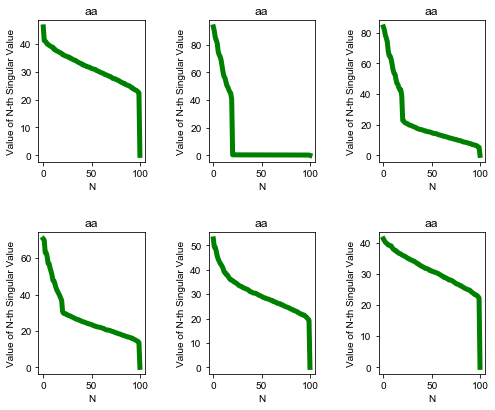

In [4]:
# 模拟出Z, A, W, b, e
# n=100,p=1000,k=20, seed=1666

# 生成绘图的拟合数据, 低秩和高维的比例
n, k, p, sigma_za, sigma_w = 100, 20, 1000, 0.01, 0.01
seed = np.random.randint(1e4)
print('seed = {}'.format(seed))
Z, A, W, b, e = ini__(n, k, p, seed)
X = W.copy()  # 深拷贝，b改变,W不会改变
ZA = 0.2 * np.dot(Z, A)

fig,axes = plt.subplots(2,3, figsize=(8,6.5))  # 设置图的大小
# X的低秩高维比设置
for i ,ratio in enumerate([0,1,0.8,0.5,0.2, 0.01]):
    theta_1 = np.random.choice(p, size=int(p * ratio), replace=False)
    # 选中全部为低维数据
    if ratio == 1:
        for j in range(p):
            X[:, j] = np.random.multivariate_normal(
                ZA[:, j].tolist(), (sigma_za**2 * np.eye(n)).tolist())
    # 选中全部为高维数据
    elif ratio == 0:
        for j in range(p):
            X[:, j] = np.random.multivariate_normal(
                W[:, j].tolist(), (sigma_w**2**np.eye(n)).tolist())
    else:
        for j in range(p):
            if j in theta_1:
                X[:, j] = np.random.multivariate_normal(
                    ZA[:, j].tolist(), (sigma_za**2 * np.eye(n)).tolist())
            else:
                X[:, j] = np.random.multivariate_normal(
                    W[:, j].tolist(), (sigma_w**2 * np.eye(n)).tolist())


    u,sigma1,vt=np.linalg.svd(X)
    sigma2 = np.zeros(1)
    sigma1 = np.append(sigma1, sigma2)
    # 画图

    plt.subplot(2,3,i+1)
#     plt.tight_layout() # 子图之间的间隙
    plt.subplots_adjust(hspace=0.5, wspace=0.6)  # 子图之间间隙大小调整    
    plt.plot(range(len(sigma1)), sigma1, 'g',linewidth = 5.0,linestyle = '-')
    plt.xlabel('N')
    plt.ylabel('Value of N-th Singular Value')
    plt.title('aa')
    


# 数据拟合--简单定义

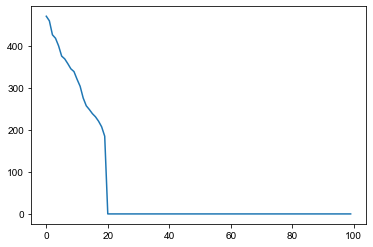

In [9]:
n, k, p, seed = 100, 20, 1000, 2222
# 合成人工数据
Z, A, W, b, e = ini__(n, k, p, seed)
# 首先看ZA是否为低秩数据
ZA = np.dot(Z, A)
u,sigma1,vt=np.linalg.svd(ZA)
plt.figure()
plt.plot(range(len(sigma1)), sigma1)
plt.show()

In [10]:
n, k, p, seed = 100, 20, 1000, 2222
# 合成人工数据
Z, A, W, b, e = ini__(n, k, p, seed)
# 首先看ZA是否为低秩数据
ZA = np.dot(Z, A)





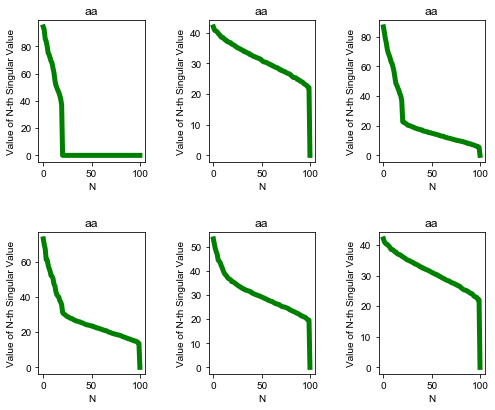

In [11]:
# 模拟出Z, A, W, b, e
# n=100,p=1000,k=20, seed=1666

# 生成绘图的拟合数据, 低秩和高维的比例
n, k, p,seed = 100, 20, 1000, 2222
Z, A, W, b, e = ini__(n, k, p, seed)
X = W.copy()  # 深拷贝，b改变,W不会改变
ZA = 0.2 * np.dot(Z, A)

fig,axes = plt.subplots(2, 3, figsize=(8,6.5))  # 设置图的大小
# X的低秩高维比设置
for i ,ratio in enumerate([1,0,0.8,0.5,0.2, 0.01]):
    # 选中全部为低维数据
    if ratio == 0:
        X = W
    elif ratio ==1:
        X = ZA
    else:
        X = np.zeros((n,p))
        X[:,range(int(ratio * p))] = ZA[:,range(int(ratio * p))] # 前ratio*p 个特征等于ZA的前ratio*p个特征。 后面的int(ratio*p)个特征等于W的后int(ratio*p)个特征
        X[:,int(ratio * p):] = W[:, int(ratio * p):]
        

    u,sigma1,vt=np.linalg.svd(X)
    sigma2 = np.zeros(1)
    sigma1 = np.append(sigma1, sigma2)
    # 画图

    plt.subplot(2,3,i+1)
#     plt.tight_layout() # 子图之间的间隙
    plt.subplots_adjust(hspace=0.5, wspace=0.6)  # 子图之间间隙大小调整    
    plt.plot(range(len(sigma1)), sigma1, 'g',linewidth = 5.0,linestyle = '-')
#     plt.scatter(20, sigma1[20], 'r')
    plt.xlabel('N')
    plt.ylabel('Value of N-th Singular Value')
    plt.title('aa')
    

In [24]:
np.random.seed(123456)
za1 = np.arange(200).reshape(10,20)
w1 = np.random.rand(10,20)
c1 = za1.copy()
c1[:,[1,3,5,7,9,11,13,15,17]]=w1[:,[1,3,5,7,9,11,13,15,17]] 

# 随机选择15个特征来自
u,sigma_c1,vt = np.linalg.svd(c1)
sigma_c1

array([1.21002747e+03, 3.23036976e+01, 1.05545390e-13, 1.78712038e-14,
       1.02842327e-14, 8.16254132e-15, 7.40469539e-15, 4.72048294e-15,
       2.25469638e-15, 1.07247520e-15])

In [28]:
c2 = za1.copy()
c2[:,-9:]=w1[:,-9:] 

# 随机选择15个特征来自
u,sigma_c2,vt = np.linalg.svd(c2)
sigma_c2

array([1.16471269e+03, 1.71565851e+01, 7.70539364e-14, 2.45675090e-14,
       9.49117438e-15, 3.20365103e-15, 2.54138205e-15, 1.99271824e-15,
       4.34055456e-16, 1.45886194e-16])

In [31]:
sigma_c1 - sigma_c2

array([ 4.53147765e+01,  1.51471126e+01,  2.84914537e-14, -6.69630517e-15,
        7.93058296e-16,  4.95889029e-15,  4.86331334e-15,  2.72776470e-15,
        1.82064092e-15,  9.26589008e-16])

# 生物数据

In [12]:
# # 转置
# data1 = {"a":[1,2,3],"b":[3,4,5]}
# data2 = pd.DataFrame(data1)

# data2, data2.T

In [ ]:
import pandas as pd
path = '/Users/snszz/PycharmProjects/hybrid_sl_code_python/data/LUAD_Counts_expMatrix.CSV'
gene = pd.read_csv(path, header=0, index_col=0) # 表示不要新的索引，以数据的第一列，和第一行为索引
gene.head()
gene = gene.T   # ().T
# print(gene.shape)
# gene.head(3)

# 1e4:4s; 2e4:24.7s; 25000:44.9s; 3e4:;
u,sigma_gene,vt=np.linalg.svd(gene.values)
sigma_gene

# u,sigma_gene,vt=np.linalg.svd(gene.values[:,:25000])
plt.figure()
plt.plot(range(len(sigma_gene)), sigma_gene)
plt.show()

# gene data

In [31]:
import pandas as pd
path_DLBCL = '/Users/snszz/PycharmProjects/hybrid_sl_code_python/data/gene/gene/DLBCL.xlsx'
gene_raw = pd.read_excel(path_DLBCL, sheet_name = 'Sheet1', header=None) # 表示不要新的索引，以数据的第一列，和第一行为索引
gene = gene_raw.iloc[:,1:]
print(gene.shape)
print('未归一化数据:\n', gene.head(3))

# 进行最大最小归一化
from sklearn import preprocessing  

min_max_scaler = preprocessing.MinMaxScaler()   
gene_minMax = min_max_scaler.fit_transform(gene)
print('归一化数据：\n',gene_minMax)

(77, 7129)
未归一化数据:
    1     2     3     4     5     6     7     8     9     10    ...  7120  \
0  -104  -187   -26    59  -238  -258  -400  -146   -34  -100  ...   132   
1  -152  -328   -52   267  -300  -314   578  -185   111   148  ...   147   
2  -158  -129    11    88  -239  -429  -891  -258    22  -271  ...   169   

   7121  7122  7123  7124  7125  7126  7127  7128  7129  
0  1036  -161  1523   -72   897   366     3    76   -28  
1  4254   -75  6056   -68   737    81    -4    41   -45  
2  1934  -129  2901    -9   946   450    38   164   -62  

[3 rows x 7129 columns]
归一化数据：
 [[0.93506494 0.83722944 0.53553299 ... 0.90242305 0.73180873 0.98210162]
 [0.9079616  0.71515152 0.46954315 ... 0.8978389  0.71361746 0.97228637]
 [0.90457369 0.88744589 0.62944162 ... 0.92534381 0.77754678 0.96247113]
 ...
 [0.83116883 0.79393939 0.35025381 ... 0.75573019 0.58160083 0.81466513]
 [0.76397516 0.76103896 0.2284264  ... 0.83693517 0.62993763 0.83025404]
 [0.92546584 0.90649351 0.38071066 ... 0

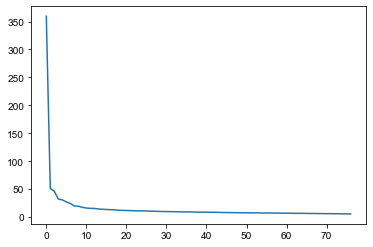

In [35]:
u,sigma_gene_minMax,vt=np.linalg.svd(gene_minMax)
sigma_gene

# u,sigma_gene,vt=np.linalg.svd(gene.values[:,:25000])
plt.figure()
plt.plot(range(len(sigma_gene_minMax)), sigma_gene_minMax)
plt.show()

In [27]:
gene.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,-104,-187,-26,59,-238,-258,-400,-146,-34,-100,...,132,1036,-161,1523,-72,897,366,3,76,-28
1,-152,-328,-52,267,-300,-314,578,-185,111,148,...,147,4254,-75,6056,-68,737,81,-4,41,-45
2,-158,-129,11,88,-239,-429,-891,-258,22,-271,...,169,1934,-129,2901,-9,946,450,38,164,-62
3,-124,-121,-3,-37,-210,-309,-489,-69,-35,172,...,13,2469,93,2465,-119,339,321,-63,73,-13
4,-93,-258,-36,109,-109,-272,-469,-279,-90,-31,...,69,608,-39,1667,-87,721,213,15,155,-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-149,-210,-24,164,-38,-191,83,-63,-158,211,...,418,1014,-531,1039,-325,412,-29,-264,-292,-384
73,-558,-167,-23,177,-41,-400,-728,-175,175,-289,...,408,1629,-378,311,-251,1571,861,-53,17,-396
74,-288,-237,-99,200,-50,-186,-9,-158,-35,87,...,288,573,-26,1170,-262,322,-109,-221,-213,-318
75,-407,-275,-147,190,-158,-248,-201,-91,16,781,...,239,501,-329,335,-214,875,157,-97,-120,-291


In [29]:
# 对数据进行归一化



array([[0.93506494, 0.83722944, 0.53553299, ..., 0.90242305, 0.73180873,
        0.98210162],
       [0.9079616 , 0.71515152, 0.46954315, ..., 0.8978389 , 0.71361746,
        0.97228637],
       [0.90457369, 0.88744589, 0.62944162, ..., 0.92534381, 0.77754678,
        0.96247113],
       ...,
       [0.83116883, 0.79393939, 0.35025381, ..., 0.75573019, 0.58160083,
        0.81466513],
       [0.76397516, 0.76103896, 0.2284264 , ..., 0.83693517, 0.62993763,
        0.83025404],
       [0.92546584, 0.90649351, 0.38071066, ..., 0.89980354, 0.88461538,
        0.96766744]])

In [40]:
# 进范数归一化
from sklearn import preprocessing  
gene_normalized = preprocessing.normalize(gene, norm='l2')
print('归一化数据：\n',gene_normalized)

u,sigma_gene_nomalized,vt=np.linalg.svd(gene_normalized)
print(sigma_gene_nomalized)


归一化数据：
 [[-4.73728132e-04 -8.51799622e-04 -1.18432033e-04 ...  1.36652346e-05
   3.46185943e-04 -1.27542189e-04]
 [-5.67860732e-04 -1.22538369e-03 -1.94268145e-04 ... -1.49437035e-05
   1.53172961e-04 -1.68116664e-04]
 [-6.17378380e-04 -5.04062095e-04  4.29820391e-05 ...  1.48483408e-04
   6.40823128e-04 -2.42262402e-04]
 ...
 [-1.20908900e-03 -9.94979490e-04 -4.15624344e-04 ... -9.27807879e-04
  -8.94222073e-04 -1.33503577e-03]
 [-1.82593805e-03 -1.23374193e-03 -6.59491140e-04 ... -4.35174426e-04
  -5.38360114e-04 -1.30552328e-03]
 [-5.03250892e-04 -4.45023516e-04 -3.61841550e-04 ... -4.15909828e-06
   1.53886636e-03 -2.20432209e-04]]
[8.23926788 1.51440864 1.0347721  0.84406422 0.72492628 0.62357649
 0.61417085 0.53781926 0.49660801 0.44455182 0.40939132 0.40587732
 0.38255002 0.37740863 0.35764276 0.3462208  0.33486861 0.3274325
 0.32044224 0.30666566 0.28868447 0.28636288 0.27339461 0.27126427
 0.26612729 0.25635568 0.24611    0.23756623 0.23612056 0.22683661
 0.22081086 0.21254952

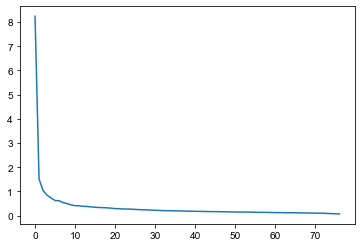

In [46]:
# u,sigma_gene,vt=np.linalg.svd(gene.values[:,:25000])
plt.figure()
plt.plot(range(sigma_gene_nomalized.shape[0]), sigma_gene_nomalized)
plt.show()